In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.gridspec as gridspec 
from scipy import stats
import seaborn as sns
sns.set_style('whitegrid')

import warnings
warnings.simplefilter(action='ignore')

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, RandomizedSearchCV, train_test_split
import math
import sklearn.model_selection as ms
import sklearn.metrics as sklm

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session


In [2]:
data = pd.read_csv('retail_price.csv')

In [3]:
data['product_category_name'].nunique()

9

In [4]:
data.head(5).T    

,0,1,2,3,4
product_id,bed1,bed1,bed1,bed1,bed1
product_category_name,bed_bath_table,bed_bath_table,bed_bath_table,bed_bath_table,bed_bath_table
month_year,2017-05-01,2017-06-01,2017-07-01,2017-08-01,2017-09-01
qty,1,3,6,4,2
total_price,45.95,137.85,275.7,183.8,91.9
freight_price,15.1,12.933333,14.84,14.2875,15.1
unit_price,45.95,45.95,45.95,45.95,45.95
product_name_lenght,39,39,39,39,39
product_description_lenght,161,161,161,161,161
product_photos_qty,2,2,2,2,2


In [5]:
data['product_category_name'].value_counts()

garden_tools             160
health_beauty            130
watches_gifts            103
computers_accessories     69
bed_bath_table            61
cool_stuff                57
furniture_decor           48
perfumery                 26
consoles_games            22
Name: product_category_name, dtype: int64

In [6]:
data.columns

Index(['product_id', 'product_category_name', 'month_year', 'qty',
       'total_price', 'freight_price', 'unit_price', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_score', 'customers', 'weekday', 'weekend', 'holiday', 'month',
       'year', 's', 'volume', 'comp_1', 'ps1', 'fp1', 'comp_2', 'ps2', 'fp2',
       'comp_3', 'ps3', 'fp3', 'lag_price'],
      dtype='object')

## Explore total_price column

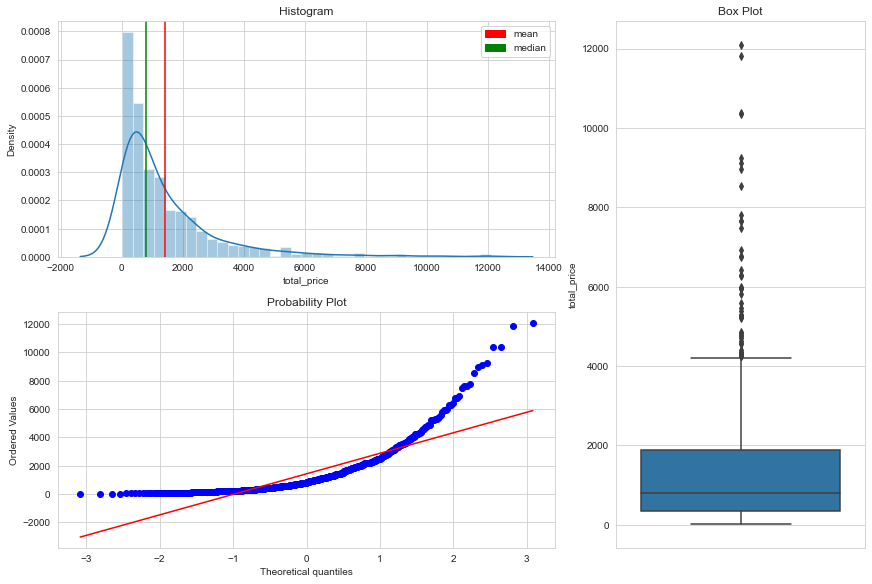

In [5]:
#import mpatches
import matplotlib.patches as mpatches
def three_chart_plot(df, feature):
    fig = plt.figure(constrained_layout = True, figsize = (12, 8))
    grid = gridspec.GridSpec(ncols = 3, nrows = 2, figure = fig)
    
    ax1 = fig.add_subplot(grid[0, :2])
    ax1.set_title('Histogram')
    
    sns.distplot(df.loc[:, feature], norm_hist = True,ax = ax1)
    plt.axvline(x = df[feature].mean(), c = 'red')
    plt.axvline(x = df[feature].median(), c = 'green')
    # set legend for red and green line
    red_patch = mpatches.Patch(color = 'red', label = 'mean')
    green_patch = mpatches.Patch(color = 'green', label = 'median')
    plt.legend(handles = [red_patch, green_patch])
    ax2 = fig.add_subplot(grid[1, :2])
    ax2.set_title('QQ_plot')
    stats.probplot(df.loc[:,feature], plot = ax2)

    ## Customizing the Box Plot. 
    ax3 = fig.add_subplot(grid[:, 2])
    ## Set title. 
    ax3.set_title('Box Plot')
    sns.boxplot(y=df[feature], ax = ax3 )
    
three_chart_plot(data, 'total_price')


From the above plots, we can observe that the total_price is not normally distributed. From the boxplot we can observe that the dataset have a number of outliers.

For the probability plot, the red line represents those points which would have been plotted for y-axis points if those were normally distributed. But the blue points represents the actual scenario. We can see that there is a lot of deviation on the both the ends i.e on the top right and bottom left.

As the mean of the feature is greater than the median which is greater than the mode and the line is flat towards the right in the histogram, the given feature is Positively Skewed. Most of the houses were sold less than the average price.


In [6]:
from scipy.stats import skew
print("Skewness of the SalesPrice is", data['total_price'].skew())

Skewness of the SalesPrice is 2.613958654543281


<AxesSubplot:>

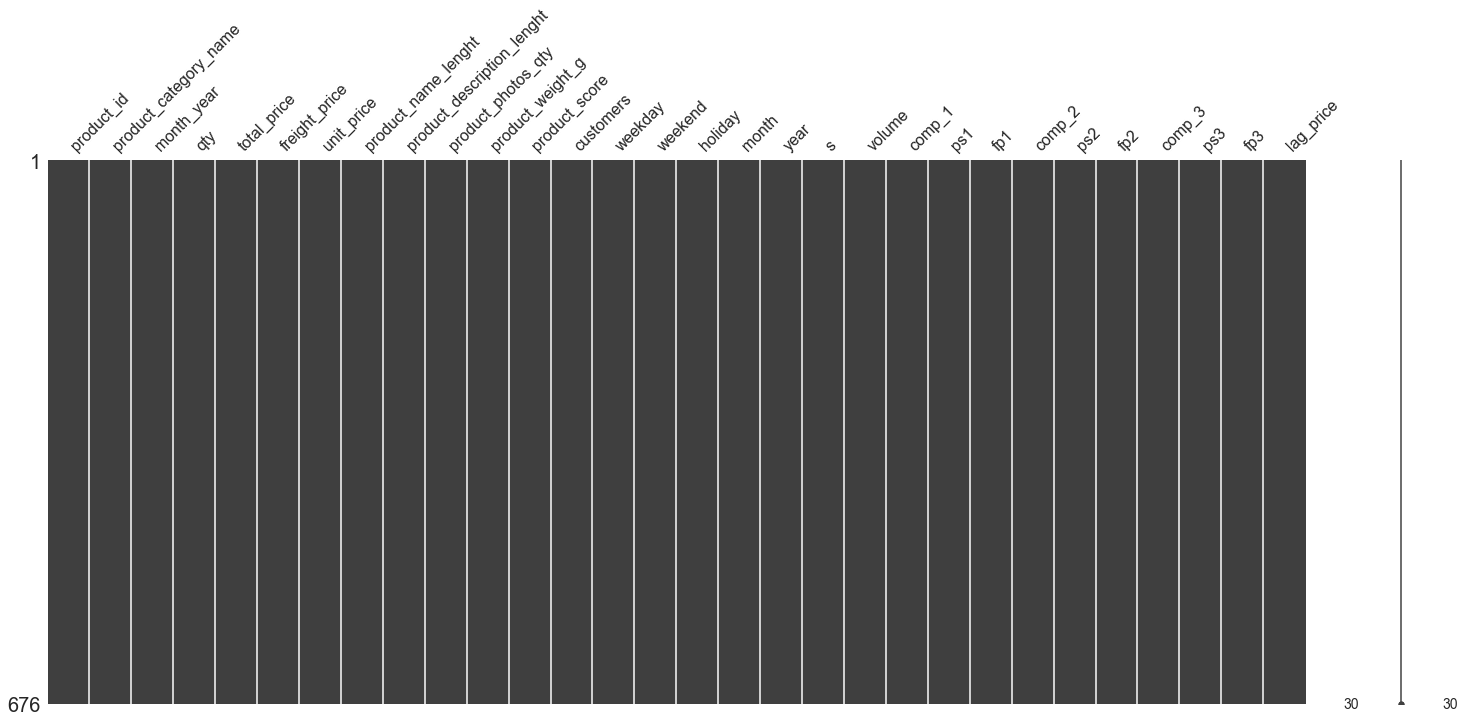

In [9]:
import missingno as msno
%matplotlib inline
msno.matrix(data)

No missing value. yay

In [10]:
num_col = data.select_dtypes(include = np.number).columns

In [15]:
#get continuous columns from num_col
drawl_col = ['qty', 'freight_price', 'unit_price',
       'product_name_lenght', 'product_description_lenght',
       'product_photos_qty', 'product_weight_g',
       'holiday', 's', 'volume', 'comp_1', 'fp1', 'comp_2',
       'fp2', 'comp_3', 'fp3', 'lag_price',  'lag_ps1',
       'lag_ps2', 'lag_ps3', 'lag_total_price', 'lag_customers',
       'lag_product_score']

In [12]:
len(drawl_col)

24

KeyError: 'lag_ps1'

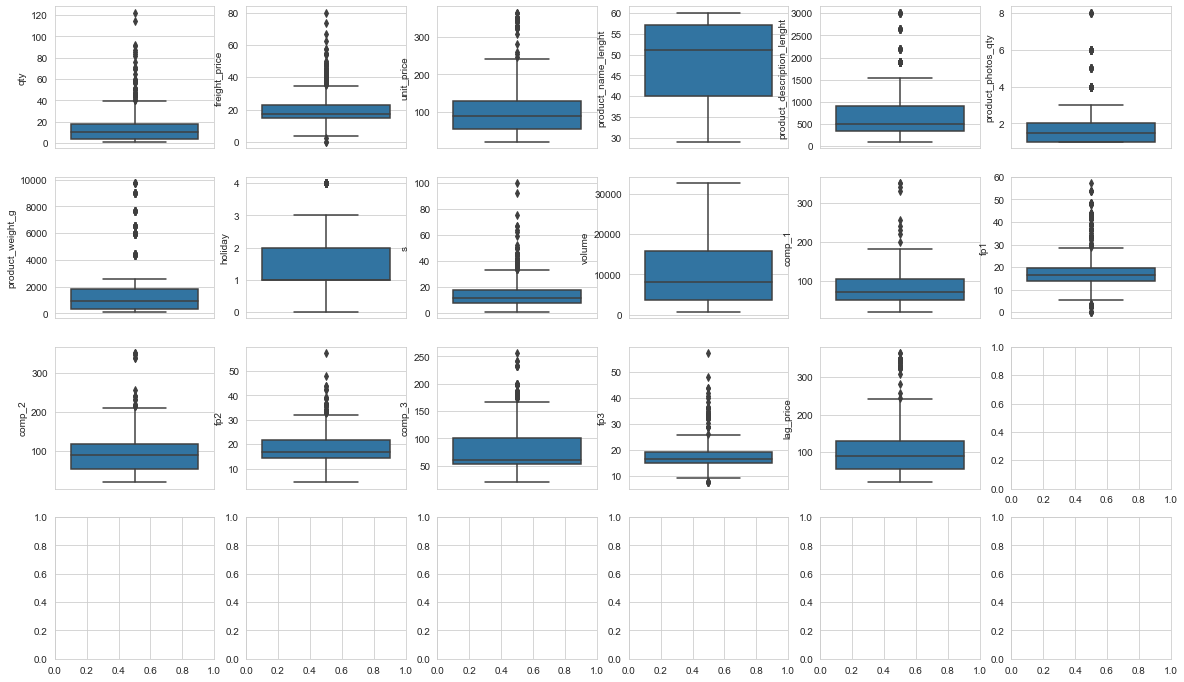

In [16]:
#plot boxplot in vertical for all numerical variables. dont plot axes if there is no column else
fig, axes = plt.subplots(4, 6, figsize=(20, 12))
axes = axes.flatten()
for i in range(0,len(drawl_col)):
    
    sns.boxplot(y=data[drawl_col[i]], ax=axes[i])
plt.tight_layout()
plt.show()
    

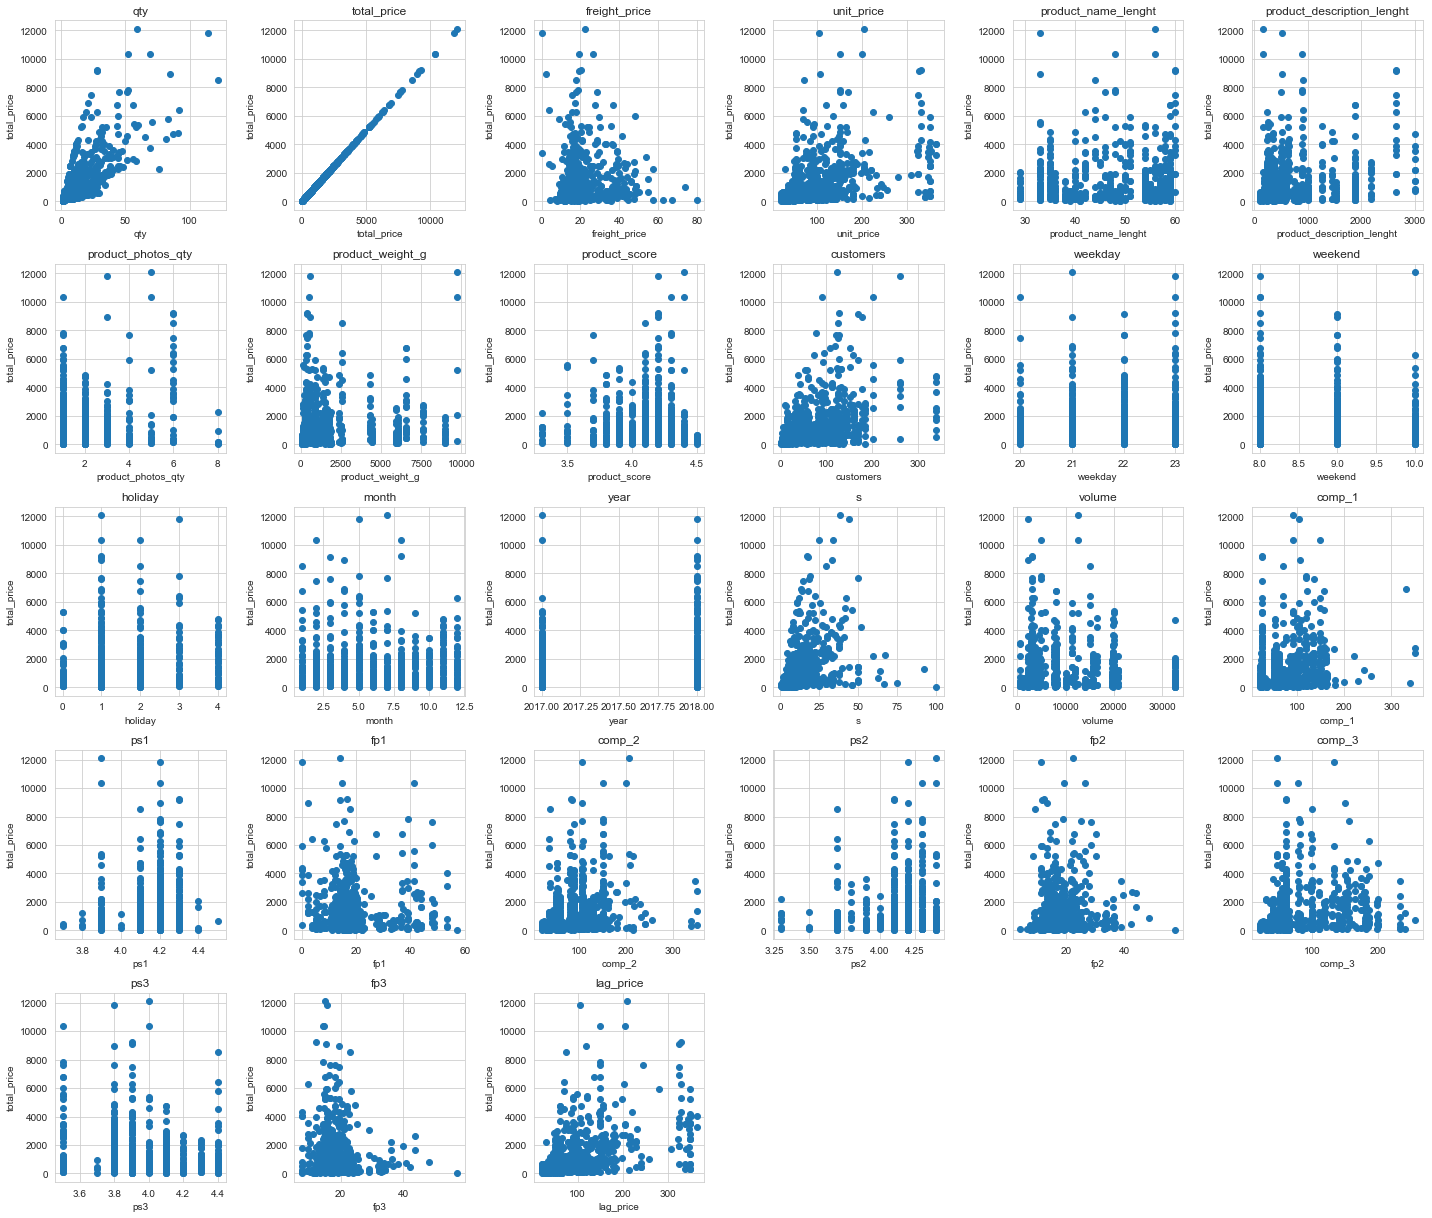

In [14]:
# plot scatter plot for all numerical variables in same plot
plt.figure(figsize = (20, 20))
for i, col in enumerate(num_col):
    plt.subplot(6, 6, i+1)
    plt.scatter(data[col], data['total_price'])
    plt.xlabel(col)
    plt.ylabel('total_price')
    plt.title(col)
    plt.tight_layout()
    

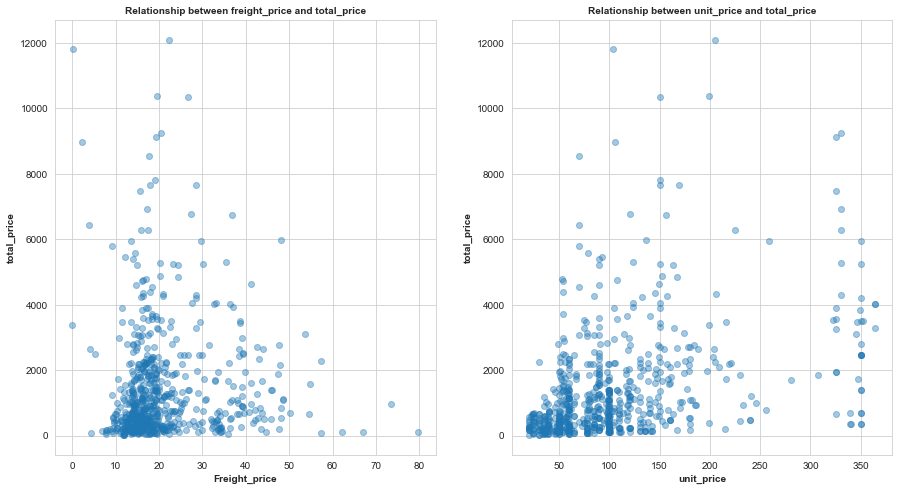

In [16]:
fig, (ax1, ax2) = plt.subplots(figsize = (15, 8), ncols = 2,sharey = False)
ax1.scatter(x = 'freight_price', y = 'total_price', data = data,  alpha=0.4)
ax1.set_title('Relationship between freight_price and total_price', weight = 'bold', fontsize = 10)
ax1.set_xlabel('Freight_price', weight = 'bold')
ax1.set_ylabel('total_price', weight = 'bold')
ax2.scatter(x = 'unit_price', y = 'total_price', data = data,  alpha=0.4)
ax2.set_title('Relationship between unit_price and total_price', weight = 'bold', fontsize = 10)
ax2.set_xlabel('unit_price', weight = 'bold')
ax2.set_ylabel('total_price', weight = 'bold')

plt.show()


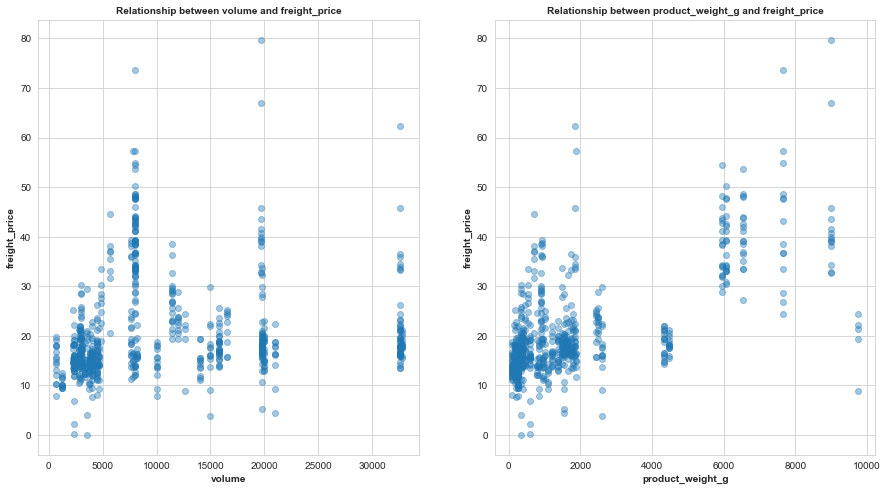

In [17]:
fig, (ax1, ax2) = plt.subplots(figsize = (15, 8), ncols = 2,sharey = False)
ax1.scatter(x = 'volume', y = 'freight_price', data = data,  alpha=0.4)
ax1.set_title('Relationship between volume and freight_price', weight = 'bold', fontsize = 10)
ax1.set_xlabel('volume', weight = 'bold')
ax1.set_ylabel('freight_price', weight = 'bold')
ax2.scatter(x = 'product_weight_g', y = 'freight_price', data = data,  alpha=0.4)
ax2.set_title('Relationship between product_weight_g and freight_price', weight = 'bold', fontsize = 10)
ax2.set_xlabel('product_weight_g', weight = 'bold')
ax2.set_ylabel('freight_price', weight = 'bold')

plt.show()


### Residual plot
A residual plot is a type of plot that displays the fitted values of a regression model on the x-axis and the residuals of the model along the y-axis.

<AxesSubplot:xlabel='freight_price', ylabel='total_price'>

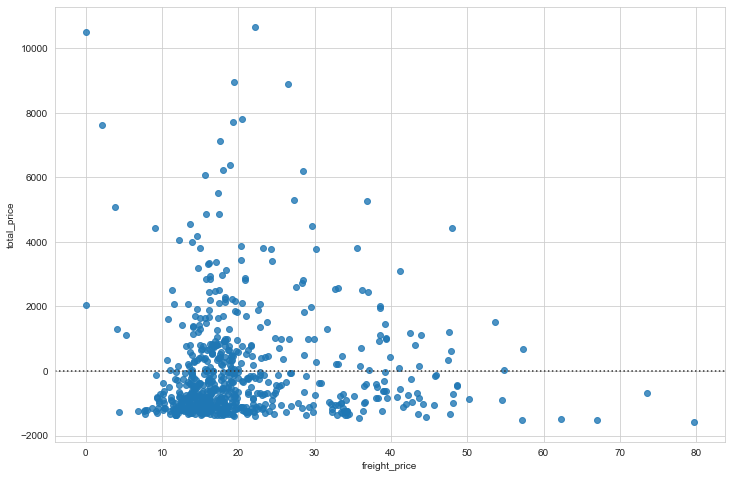

In [18]:
plt.subplots(figsize = (12,8))
sns.residplot(data['freight_price'], data['total_price'])


Ideally, if the assumptions are met, the residuals will be randomly scattered around the centerline of zero with no apparent pattern. The residual will look like an unstructured cloud of points centered around zero. However, our residual plot is anything but an unstructured cloud of points.

The error plot shows that as freight_price value increases, the variance also increases, which is the characteristics known as Heteroscedasticity. The linear regression analysis requires the dependent variable to be multivariate normally distributed. A histogram, box plot, or a Q-Q-Plot can check if the target variable is normally distributed.



We will do log transform for target variable to get a more normal distribution

In [146]:
data['total_price_log'] = np.log(data['total_price'])

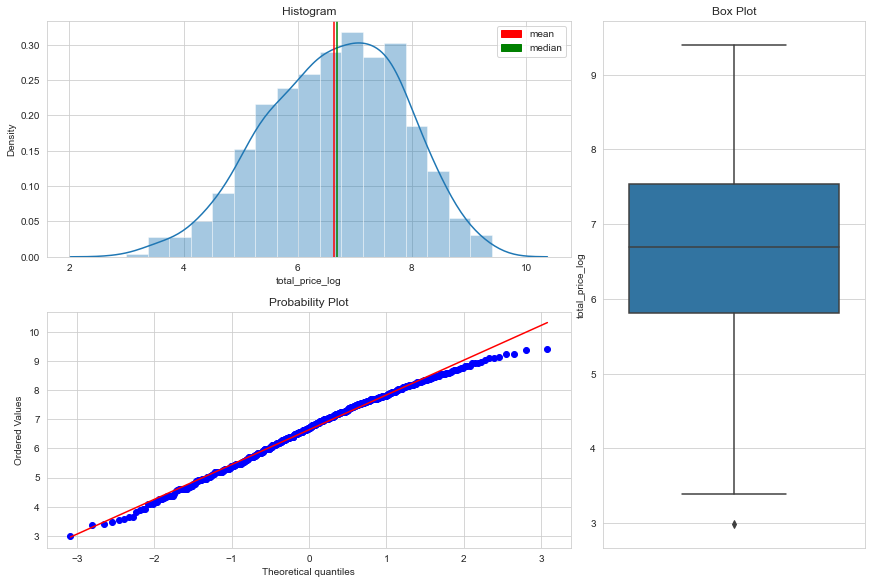

In [147]:
three_chart_plot(data, 'total_price_log')

We can observe that the total_price feature now follows a normal distibution as the Histogram resembles bell-shape and the QQ-plot also overlaps with the red line. Let's again plot the scatter plot for freight_price and total_price to see whether Heteroscedasticity was removed.


<AxesSubplot:xlabel='freight_price', ylabel='total_price_log'>

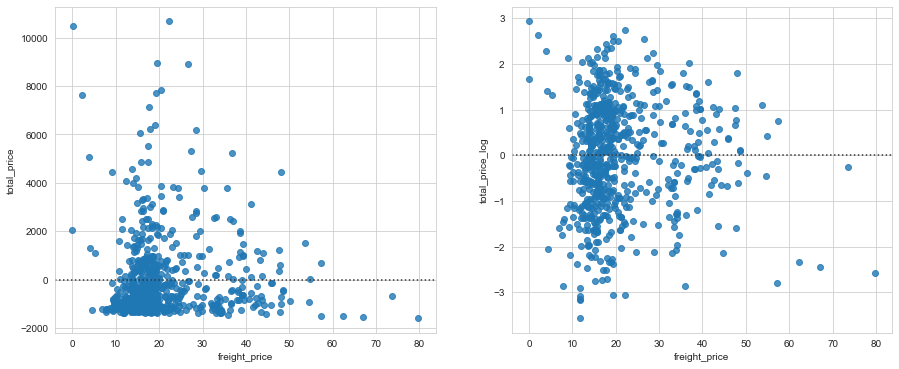

In [148]:
fig, (ax1, ax2) = plt.subplots(figsize = (15, 6),
                              ncols = 2,
                              sharey = False,
                              sharex = False)

sns.residplot(data['freight_price'], data['total_price'], ax = ax1)
sns.residplot(data['freight_price'], data['total_price_log'], ax = ax2)


We can see that the scatterplot on the left had heteroscedasticity(funnel like shape) but after applying log transformation to the feature, it was removed and now it's Homoscedastic.


<AxesSubplot:xlabel='s', ylabel='total_price_log'>

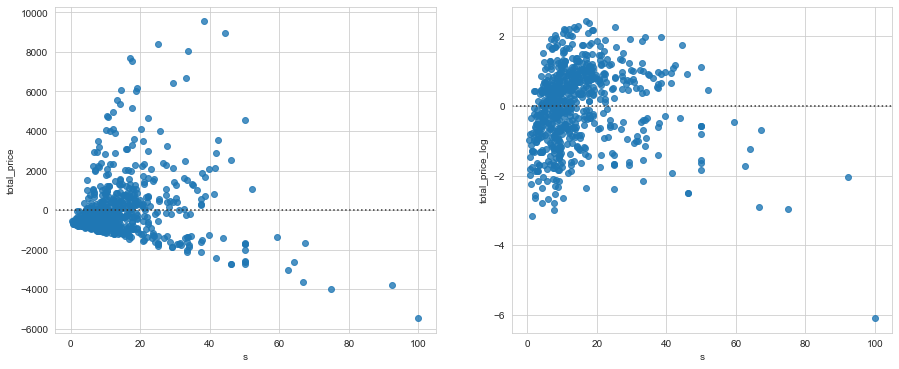

In [22]:
fig, (ax1, ax2) = plt.subplots(figsize = (15, 6),
                              ncols = 2,
                              sharey = False,
                              sharex = False)

sns.residplot(data['s'], data['total_price'], ax = ax1)
sns.residplot(data['s'], data['total_price_log'], ax = ax2)


## Explore numerical features

In [8]:

# create lag_ps1 and lag_ps2
data['lag_ps1'] = data.groupby(['product_id'])['ps1'].shift(1)
data['lag_ps2'] = data.groupby(['product_id'])['ps2'].shift(1)
data['lag_ps3'] = data.groupby(['product_id'])['ps3'].shift(1)
data['lag_total_price'] = data.groupby(['product_id'])['total_price'].shift(1)
data['lag_customers'] = data.groupby(['product_id'])['customers'].shift(1)
data['lag_product_score'] = data.groupby(['product_id'])['product_score'].shift(1) 
data['lag_qty'] = data.groupby(['product_id'])['qty'].shift(1)
# when lag_ps1 is null, replace it with ps1
data['lag_ps1'] = data['lag_ps1'].fillna(data['ps1'])
data['lag_ps2'] = data['lag_ps2'].fillna(data['ps2'])
data['lag_ps3'] = data['lag_ps3'].fillna(data['ps3'])
data['lag_total_price'] = data['lag_total_price'].fillna(data['total_price'])
data['lag_customers'] = data['lag_customers'].fillna(data['customers'])
data['lag_product_score'] = data['lag_product_score'].fillna(data['product_score'])
data['lag_qty'] = data['lag_qty'].fillna(data['qty'])

In [9]:
data = data.sort_values(by=['product_id', 'month_year'])


In [10]:
data.head(5).T

,0,1,2,3,4
product_id,bed1,bed1,bed1,bed1,bed1
product_category_name,bed_bath_table,bed_bath_table,bed_bath_table,bed_bath_table,bed_bath_table
month_year,2017-05-01,2017-06-01,2017-07-01,2017-08-01,2017-09-01
qty,1,3,6,4,2
total_price,45.95,137.85,275.7,183.8,91.9
freight_price,15.1,12.933333,14.84,14.2875,15.1
unit_price,45.95,45.95,45.95,45.95,45.95
product_name_lenght,39,39,39,39,39
product_description_lenght,161,161,161,161,161
product_photos_qty,2,2,2,2,2


In [149]:
#create feature mean_total_price calculate mean of total_price for each product_id of all previous months for this month
data = data.sort_values(by=['product_id', 'month_year'])

# Calculate mean price for each product_id in all previous months
data['mean_prev_price'] = data.groupby('product_id')['total_price_log'].transform(lambda x: x.expanding().mean().shift(fill_value=0))
data['var_prev_price'] = data.groupby('product_id')['total_price_log'].transform(lambda x: x.expanding().var().shift(fill_value=0))

In [150]:
data['var_prev_price'] = data['var_prev_price'].fillna(0)

In [151]:
data.drop(['ps1', 'ps2', 'ps3',  'customers', 'product_score'], axis = 1, inplace = True)

KeyError: "['ps1', 'ps2', 'ps3', 'customers', 'product_score'] not found in axis"

In [14]:
# get list of numerical features
num_feats = data.dtypes[data.dtypes != 'object'].index

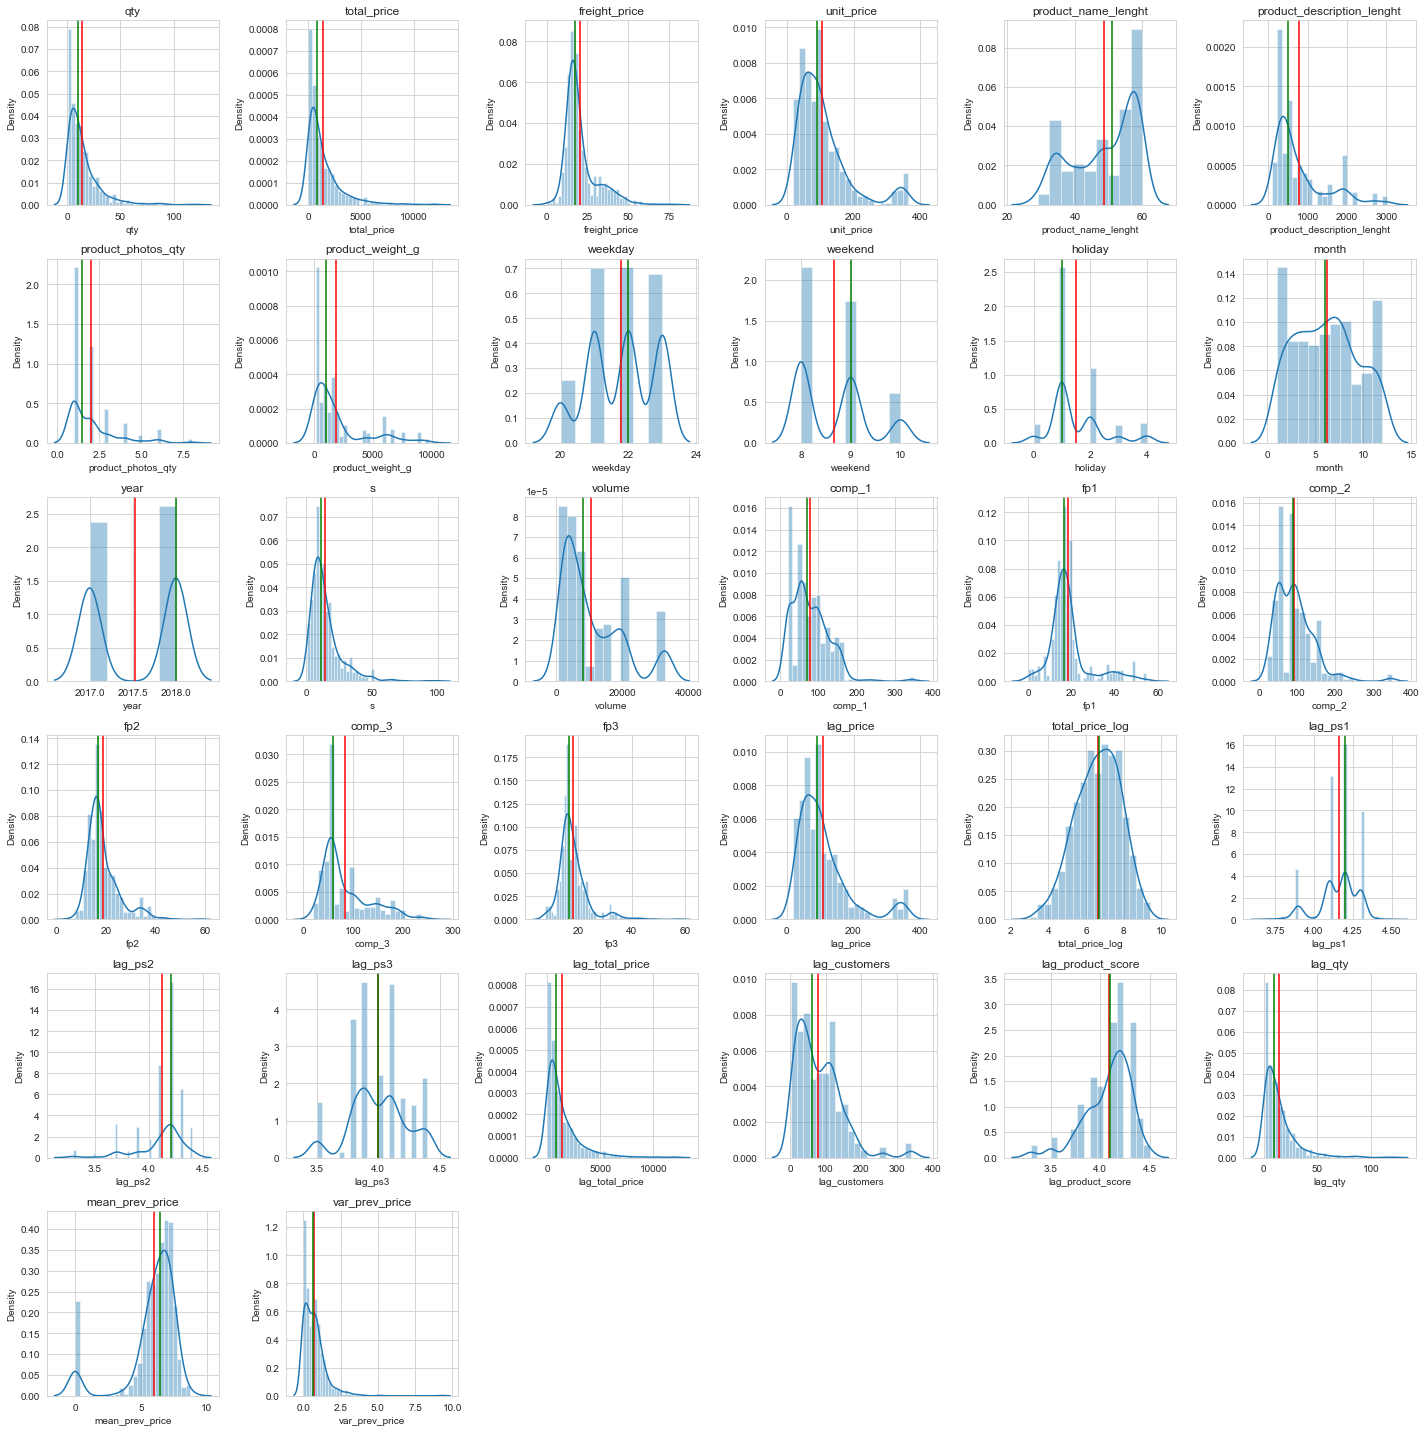

In [15]:
#plot distribution for all numerical features
fig, ax = plt.subplots(figsize=(20,20))
for i, col in enumerate(num_feats):
    plt.subplot(6, 6, i+1)
    sns.distplot(data[col])
    plt.axvline(x = data[col].mean(), c = 'red')
    plt.axvline(x = data[col].median(), c = 'green')
    # set legend for red and green line
    red_patch = mpatches.Patch(color = 'red', label = 'mean')
    green_patch = mpatches.Patch(color = 'green', label = 'median')

    plt.title(col)
plt.tight_layout()
plt.show()

In [16]:
#convert month_year to datetime format %Y-%m-%d
data['month_year'] = pd.to_datetime(data['month_year'], format = f'%Y-%m-%d')

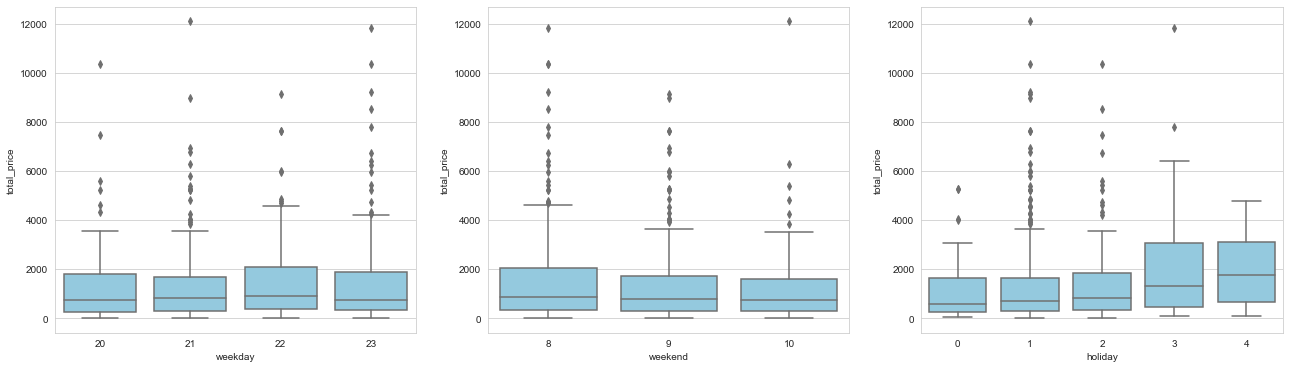

In [14]:
#plot 3 box plot for total_price for each number of weekdays, weekend and holiday, make all boxes have same colors
fig, ax = plt.subplots(figsize=(22, 6))
plt.subplot(1, 3, 1)
sns.boxplot(x='weekday', y='total_price', data=data, color = 'skyblue')
plt.subplot(1, 3, 2)
sns.boxplot(x='weekend', y='total_price', data=data,color = 'skyblue' )
plt.subplot(1, 3, 3)
sns.boxplot(x='holiday', y='total_price', data=data,color = 'skyblue' )
plt.show()


In [99]:
data_vis_corr = data[['lag_total_price','freight_price', 'unit_price', 'qty', 'product_name_lenght', 'product_description_lenght', 'product_photos_qty',
                     'product_weight_g','volume', 'weekday', 'weekend', 'holiday', 'comp_1', 'fp1', 'lag_ps1', 'lag_price','lag_customers','lag_product_score',  'total_price']]

<AxesSubplot:>

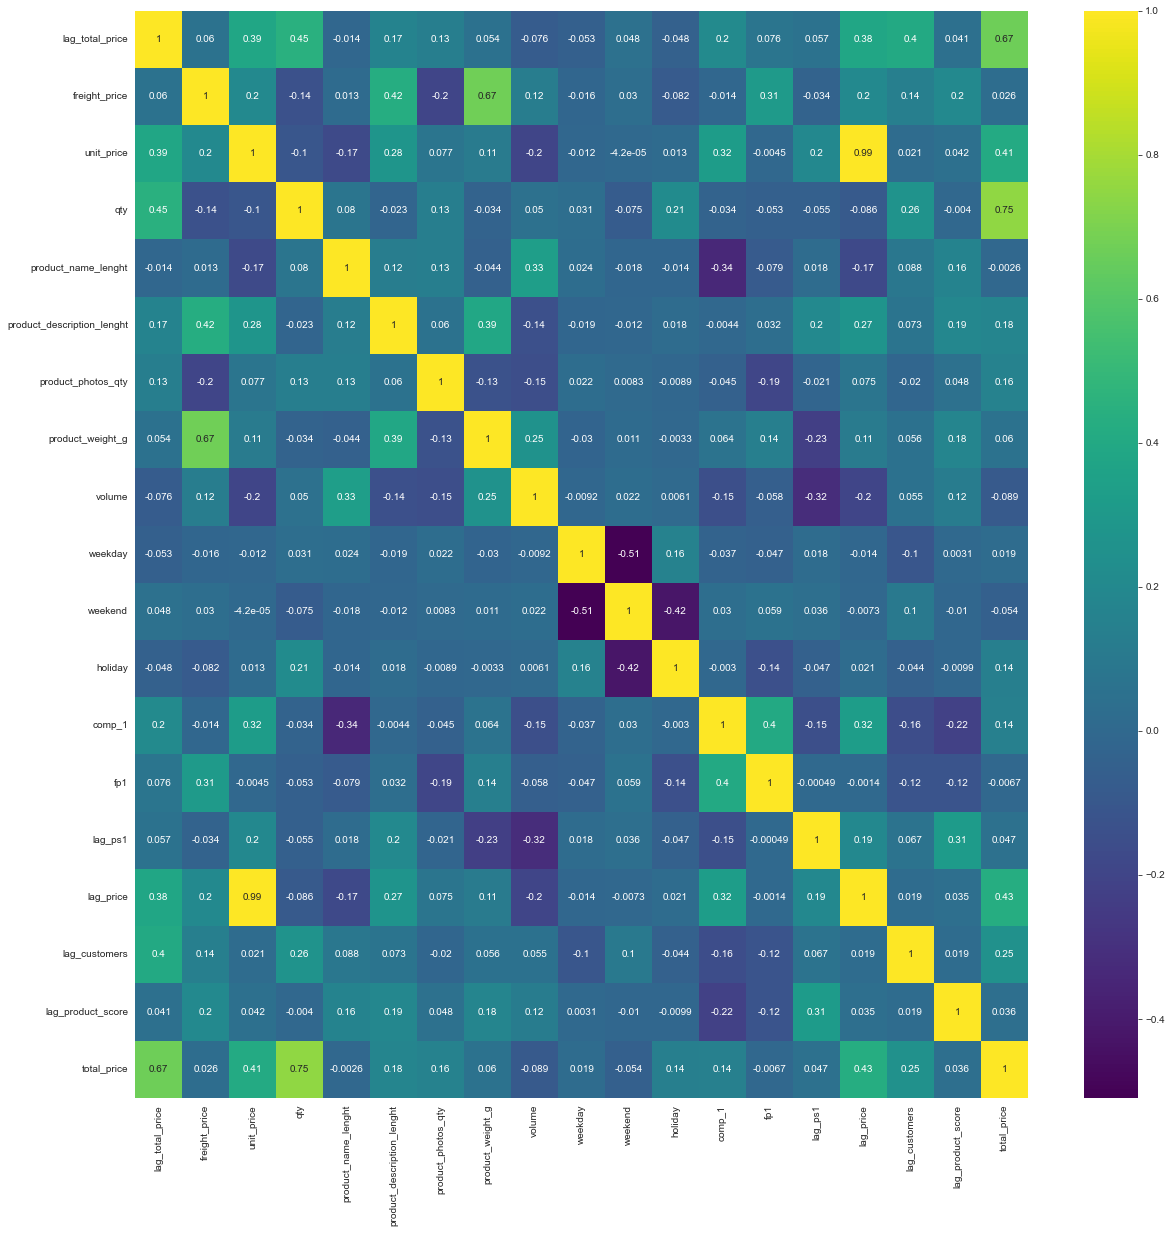

In [103]:
#plot correlation heatmap
plt.figure(figsize=(20,20))
sns.heatmap(data_vis_corr.corr(), annot=True, cmap='viridis')


## Explore categorical columns

In [24]:
data['product_category_name'].unique()

array(['bed_bath_table', 'computers_accessories', 'consoles_games',
       'cool_stuff', 'furniture_decor', 'garden_tools', 'health_beauty',
       'perfumery', 'watches_gifts'], dtype=object)

In [25]:
#plot time series for total_price for all product_id in category , each product_id has a different color
def plot_time_series(data, category):
    plt.figure(figsize=(15,8))
    sns.lineplot(x="month_year", y="total_price", hue="product_id", data=data[data['product_category_name']==category])
    plt.show()

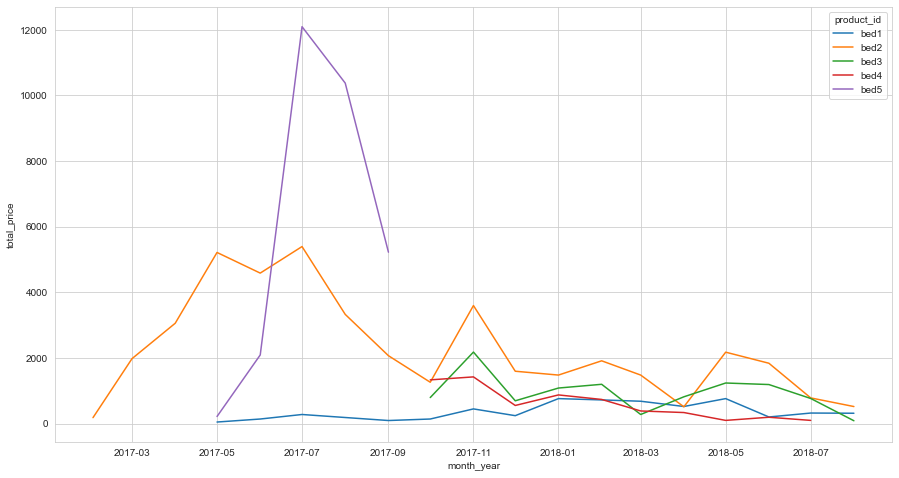

In [26]:
plot_time_series(data, 'bed_bath_table')

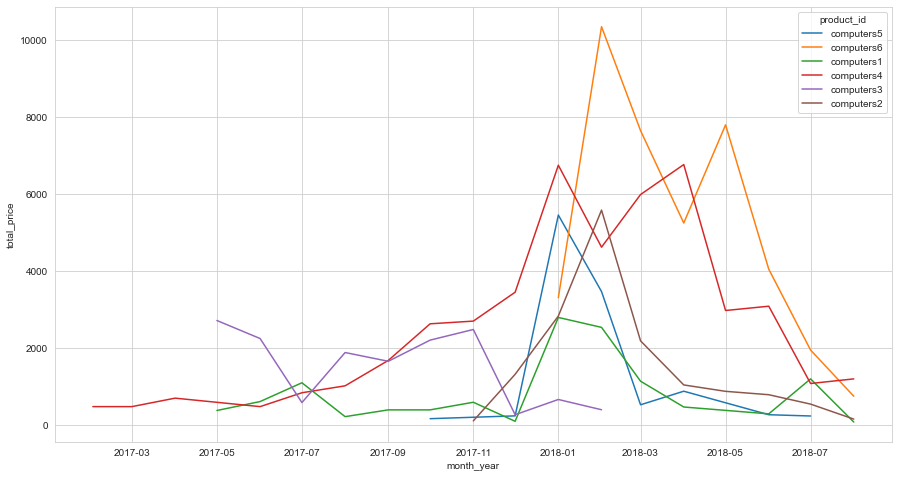

In [61]:
plot_time_series(data, 'computers_accessories')

In [27]:
#get all sns palette name for bar chart
sns.color_palette()


[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

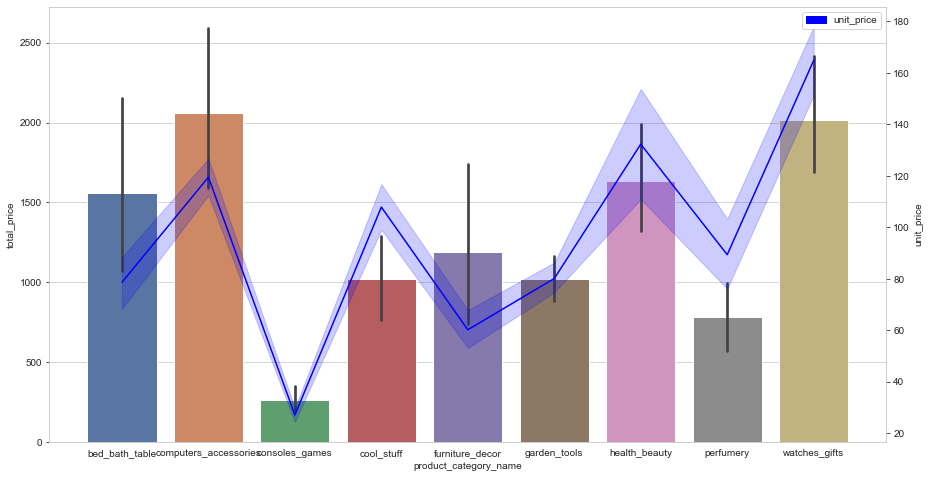

In [28]:
#bar chart for average total_price and unit_price for each product_category_name
plt.figure(figsize=(15,8))
sns.barplot(x="product_category_name", y="total_price", data=data, palette='deep')
#create line chart in the same plot for average unit_price, with other y-axis
ax2 = plt.twinx()
sns.lineplot(x="product_category_name", y="unit_price", data=data, ax=ax2, color='b')
plt.xticks(rotation=90)
plt.grid(False)
#legend to indicate which color is for total_price and which one is for unit_price
green_patch = mpatches.Patch(color = 'blue', label = 'unit_price')
plt.legend(handles = [green_patch])
plt.show()

What is interesting here?
- computers_accessories and watches_gifts brought most revenue, while watcches_gifts products are more stable.
- consoles_games didn't contribute much to the sales

In [17]:
#one hot encode for product_category_name
data = pd.get_dummies(data, columns = ['product_category_name'])

In [203]:
not_feature = ['product_id', 'month_year','qty','total_price','total_price_log','customers','ps1','ps2','ps3','product_category_name_bed_bath_table',
       'product_category_name_computers_accessories',
       'product_category_name_consoles_games',
       'product_category_name_cool_stuff',
       'product_category_name_furniture_decor',
       'product_category_name_health_beauty',
       'product_category_name_perfumery',
       'product_category_name_watches_gifts','outlier_flag']

In [204]:
bounded_range_features = ['weekday', 'weekend','holiday','product_photos_qty','lag_product_score','month','year','lag_ps1','lag_ps2','lag_ps3']
other_features = [feat for feat in data.columns if feat not in bounded_range_features and feat not in not_feature]

In [205]:
features = [col for col in data.columns if col not in not_feature]  


In [206]:
#train test split data based on product_id
from sklearn.model_selection import train_test_split
train, test = train_test_split(data, test_size=0.2, random_state=42, stratify=data['product_id'])

In [207]:
len(train)

540

In [208]:
#remove outlier in train set by using isolation forest
from sklearn.ensemble import IsolationForest
columns_to_check = ['freight_price']
clf = IsolationForest(random_state=42, contamination=0.01,n_estimators=100)
train['outlier_flag'] = clf.fit_predict(train[columns_to_check])


In [209]:
train = train[train['outlier_flag'] != -1]  # Select rows that are not outliers


In [210]:
train.columns

Index(['product_id', 'month_year', 'qty', 'total_price', 'freight_price',
       'unit_price', 'product_name_lenght', 'product_description_lenght',
       'product_photos_qty', 'product_weight_g', 'weekday', 'weekend',
       'holiday', 'month', 'year', 's', 'volume', 'comp_1', 'fp1', 'comp_2',
       'fp2', 'comp_3', 'fp3', 'lag_price', 'total_price_log', 'lag_ps1',
       'lag_ps2', 'lag_ps3', 'lag_total_price', 'lag_customers',
       'lag_product_score', 'lag_qty', 'mean_prev_price', 'var_prev_price',
       'product_category_name_bed_bath_table',
       'product_category_name_computers_accessories',
       'product_category_name_consoles_games',
       'product_category_name_cool_stuff',
       'product_category_name_furniture_decor',
       'product_category_name_garden_tools',
       'product_category_name_health_beauty',
       'product_category_name_perfumery',
       'product_category_name_watches_gifts', 'outlier_flag'],
      dtype='object')

### Scaling data

In [211]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
min_max_scaler = MinMaxScaler()
train[bounded_range_features] = min_max_scaler.fit_transform(train[bounded_range_features])
test[bounded_range_features] = min_max_scaler.transform(test[bounded_range_features])

In [212]:
#scale data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train[other_features] = scaler.fit_transform(train[other_features])
test[other_features] = scaler.transform(test[other_features])

## Modelling

### Linear models

In [213]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error

def print_metrics(y_true, y_pred):
    print('R2:', r2_score(y_true, y_pred))
    #take inverse of log1p
    y_true = np.exp(y_true)
    y_pred = np.exp(y_pred)
    
    print('MSE:', mean_squared_error(y_true, y_pred))
    print('RMSE:', np.sqrt(mean_squared_error(y_true, y_pred)))
    print('MAE:', mean_absolute_error(y_true, y_pred))
    print("MAPE", mean_absolute_percentage_error(y_true, y_pred))

In [214]:
# Linear models
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
#Linear CV models
from sklearn.linear_model import RidgeCV, LassoCV, ElasticNetCV

#LR
lr = LinearRegression()
lr.fit(train[features], train['total_price_log'])
pred = lr.predict(test[features])
print_metrics(test['total_price_log'], pred)

R2: 0.6211645891969995
MSE: 1218446.4175976685
RMSE: 1103.832603974746
MAE: 632.0089285128528
MAPE 0.8572500148870602


In [215]:
#Ridge 
ridge = Ridge()
ridge.fit(train[features], train['total_price_log'])
pred = ridge.predict(test[features])
print_metrics(test['total_price_log'], pred)

R2: 0.6186152993642744
MSE: 1226259.4302824968
RMSE: 1107.3659875048072
MAE: 632.6504318762039
MAPE 0.8570363700395751


In [216]:
#RidgeCV
ridge_cv = RidgeCV()
ridge_cv.fit(train[features], train['total_price_log'])
pred = ridge_cv.predict(test[features])
print_metrics(test['total_price_log'], pred)

R2: 0.6186152993641226
MSE: 1226259.4302829222
RMSE: 1107.3659875049993
MAE: 632.6504318764446
MAPE 0.857036370040329


In [217]:
#KNN
knn = KNeighborsRegressor( n_neighbors=14)
knn.fit(train[features], train['total_price_log'])
pred = knn.predict(test[features])
print_metrics(test['total_price_log'], pred)


R2: 0.4332706863055331
MSE: 1912525.6691254752
RMSE: 1382.9409492546945
MAE: 774.8667386199368
MAPE 1.1985663271931675


In [228]:
#SVM
from sklearn.svm import SVR
svr = SVR(C=1, epsilon=0.3, gamma = 'scale', kernel='rbf')
svr.fit(train[features], train['total_price_log'])
pred = svr.predict(test[features])
print_metrics(test['total_price_log'], pred)

R2: 0.6429419237102355
MSE: 1131002.3836282576
RMSE: 1063.4859583597038
MAE: 581.460058731731
MAPE 0.8430667953564369


### Tree based models

In [219]:
#fit a RF model
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=150,  random_state=42)
rf.fit(train[features], train['total_price_log'])
# predict
test_pred = rf.predict(test[features])
print_metrics(test['total_price_log'], test_pred)

R2: 0.6890871214736842
MSE: 920390.5338940333
RMSE: 959.3698629277623
MAE: 526.8218108891888
MAPE 0.7542400233188412


In [220]:
from lightgbm import LGBMRegressor

lgbm = LGBMRegressor(n_estimators=150, random_state=42)
lgbm.fit(train[features], train['total_price_log'])
# predict
test_pred = lgbm.predict(test[features])
print_metrics(test['total_price_log'], test_pred)

R2: 0.7485128316855145
MSE: 784217.1188360834
RMSE: 885.5603417249913
MAE: 478.08136972763737
MAPE 0.6675777922123086


In [221]:
from sklearn.ensemble import ExtraTreesRegressor

etr = ExtraTreesRegressor(n_estimators=150, random_state=42)
etr.fit(train[features], train['total_price_log'])
# predict
test_pred = etr.predict(test[features])
print_metrics(test['total_price_log'], test_pred)

R2: 0.761868525338593
MSE: 763965.3375583942
RMSE: 874.0511069487837
MAE: 463.98095606725326
MAPE 0.6338310902034773


In [222]:
from xgboost import XGBRegressor   
xgb = XGBRegressor(objective= 'reg:squarederror', base_score= 0.5,  n_estimators= 94, max_depth= 4,min_child_weight= 1,colsample_bytree= 0.99,
                   gamma= 0.0087, learning_rate= 0.3000000,booster ='gbtree', tree_method ='gpu_hist', subsample= 1,random_state=42)


xgb.fit(train[features], train['total_price_log'])
pred = xgb.predict(test[features])
print_metrics(test['total_price_log'], pred)

R2: 0.7502605571202954
MSE: 857529.8812000335
RMSE: 926.0290930635135
MAE: 502.34562998266784
MAPE 0.6460918434817013


In [172]:
train[train['product_id']=='bed1'].sort_values(by=['month_year'])

,product_id,month_year,qty,total_price,freight_price,unit_price,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,...,product_category_name_bed_bath_table,product_category_name_computers_accessories,product_category_name_consoles_games,product_category_name_cool_stuff,product_category_name_furniture_decor,product_category_name_garden_tools,product_category_name_health_beauty,product_category_name_perfumery,product_category_name_watches_gifts,outlier_flag
1,bed1,2017-06-01,3,137.85,-0.800656,-0.786217,-1.049531,-0.920731,0.142857,-0.6548,...,1,0,0,0,0,-0.549945,0,0,0,1
2,bed1,2017-07-01,6,275.70,-0.597972,-0.786217,-1.049531,-0.920731,0.142857,-0.6548,...,1,0,0,0,0,-0.549945,0,0,0,1
3,bed1,2017-08-01,4,183.80,-0.656704,-0.786217,-1.049531,-0.920731,0.142857,-0.6548,...,1,0,0,0,0,-0.549945,0,0,0,1
5,bed1,2017-10-01,3,137.85,-0.570333,-0.786217,-1.049531,-0.920731,0.142857,-0.6548,...,1,0,0,0,0,-0.549945,0,0,0,1
6,bed1,2017-11-01,11,445.85,-0.492442,-0.857003,-1.049531,-0.920731,0.142857,-0.6548,...,1,0,0,0,0,-0.549945,0,0,0,1
7,bed1,2017-12-01,6,239.94,-0.556514,-0.864081,-1.049531,-0.920731,0.142857,-0.6548,...,1,0,0,0,0,-0.549945,0,0,0,1
8,bed1,2018-01-01,19,759.81,-0.417928,-0.864081,-1.049531,-0.920731,0.142857,-0.6548,...,1,0,0,0,0,-0.549945,0,0,0,1
9,bed1,2018-02-01,18,719.82,-0.713901,-0.864081,-1.049531,-0.920731,0.142857,-0.6548,...,1,0,0,0,0,-0.549945,0,0,0,1
10,bed1,2018-03-01,17,679.83,-0.425511,-0.864081,-1.049531,-0.920731,0.142857,-0.6548,...,1,0,0,0,0,-0.549945,0,0,0,1
12,bed1,2018-05-01,19,759.81,-1.085230,-0.864081,-1.049531,-0.920731,0.142857,-0.6548,...,1,0,0,0,0,-0.549945,0,0,0,1


In [192]:
#print feature importance for xgb with their corresponding feature name
feature_importance = pd.DataFrame({'feature': features, 'importance': xgb.feature_importances_})
feature_importance.sort_values(by='importance', ascending=False, inplace=True)
feature_importance

,feature,importance
23,lag_total_price,0.394582
19,lag_price,0.073119
11,s,0.069113
1,unit_price,0.045160
27,mean_prev_price,0.037267
17,comp_3,0.035904
29,product_category_name_garden_tools,0.032402
12,volume,0.026154
21,lag_ps2,0.023543
5,product_weight_g,0.019903


In [82]:
#Cross validation for xgb without scikit learn

def cross_validate(model, train_data, n_splits=10):
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    r2 = []
    rmse  = []
    mae = []
    X, y = np.array(train_data[features]), np.array(train_data['total_price_log'])
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        r2.append(r2_score(y_test, y_pred))
        rmse.append(np.sqrt(mean_squared_error(np.expm1(y_test), np.expm1(y_pred))))
        mae.append(mean_absolute_error(np.expm1(y_test), np.expm1(y_pred)))
        

    print('R2:', np.mean(r2))
    print('RMSE:', np.mean(rmse))
    print('MAE:', np.mean(mae))


In [83]:
cross_validate(xgb, train, n_splits=5)

R2: 0.7065700224036532
RMSE: 1028.0680311953745
MAE: 551.0684841555842


## Stacking


In [223]:
#make stacking model
from sklearn.ensemble import StackingRegressor
estimators = [('xgb', xgb), ('rf', rf), ('lgbm', lgbm),('etr',etr), ('knn',knn), ('svr',svr), ('ridge',ridge), ('lr',lr)]
stacking = StackingRegressor(estimators=estimators, final_estimator=LinearRegression())
stacking.fit(train[features], train['total_price_log'])
pred = stacking.predict(test[features])
print_metrics(test['total_price_log'], pred)

R2: 0.8001494166235668
MSE: 632562.4796116817
RMSE: 795.3379656546527
MAE: 430.08966415954325
MAPE 0.5677859467363022


In [180]:
import plotly.graph_objects as go

#plot predict
fig = go.Figure()
fig.add_trace(go.Scatter(x=test['total_price_log'], y=pred, mode='markers', 
                         marker=dict(color='blue'), 
                         name='Predicted vs. Actual Retail Unit Price'))
fig.add_trace(go.Scatter(x=[min(test['total_price_log']), max(test['total_price_log'])], y=[min(test['total_price_log']), max(test['total_price_log'])], 
                         mode='lines', 
                         marker=dict(color='red'), 
                         name='Ideal Prediction'))
fig.update_layout(
    title='Predicted vs. Actual Retail Price',
    xaxis_title='Actual Retail Price',
    yaxis_title='Predicted Retail Price'
)
fig.show()
